In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('./Openhealth_S-Grippal.csv', encoding = "ISO-8859-1", delimiter = ";", decimal=',', index_col=0)

In [20]:
df.head()

,IAS_brut,IAS_lissé,Incidence_Sentinelles
PERIODE,,,
2009-07-01,1.7,2.2,2.3
2009-07-02,3.4,2.1,2.3
2009-07-03,2.1,2.1,2.3
2009-07-04,1.3,2.0,2.3
2009-07-05,14.2,2.0,2.3


In [29]:
df.index.min(), df.index.max()

(Timestamp('2009-07-01 00:00:00'), Timestamp('2019-01-15 00:00:00'))

In [28]:
df.index = pd.to_datetime(df.index)nullité

In [24]:
df = df[['IAS_brut']]

In [34]:
df.isnull().sum()

IAS_brut    0
dtype: int64

In [38]:
len(df[df.IAS_brut == 0])

9

In [54]:
df[df.IAS_brut == 0]

,IAS_brut
PERIODE,


In [52]:
df = df.replace(0,np.NaN).interpolatepolate()

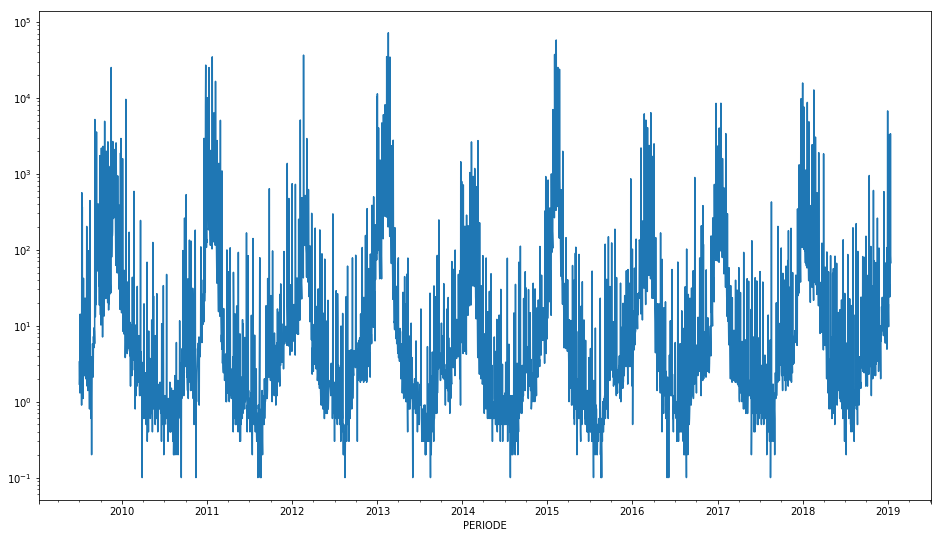

In [53]:
plt.figure(figsize=(16,9))
df.IAS_brut.plot(logy=True)
plt.show()

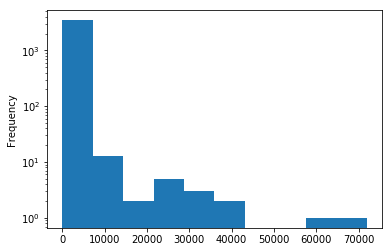

In [71]:
df.IAS_brut.plot(kind='hist',logy=True)

In [59]:
from scipy import signal

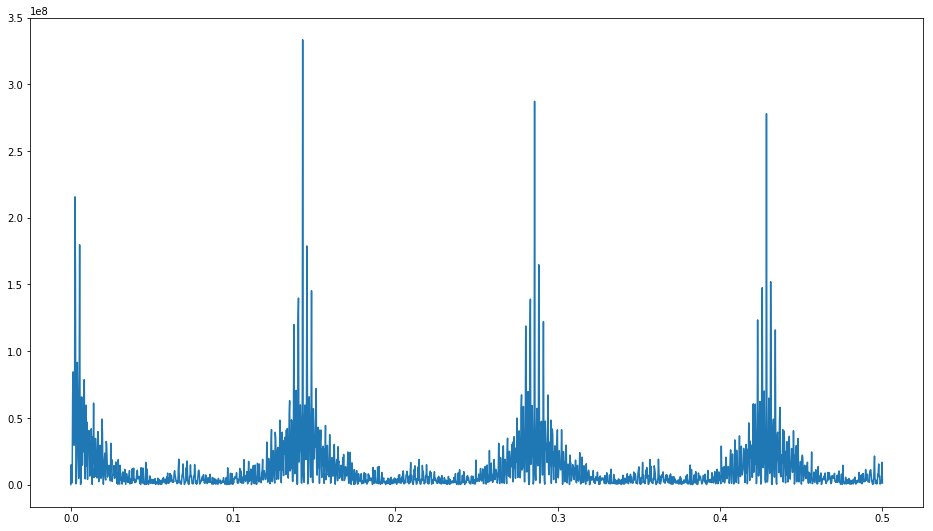

In [67]:
plt.figure(figsize=(16,9))
plt.plot(signal.periodogram(df.IAS_brut)[0], signal.periodogram(df.IAS_brut)[1])
plt.show()

In [81]:
df.index.diff()

AttributeError: 'DatetimeIndex' object has no attribute 'diff'

In [73]:
df['IAS_brut_ws'] = df.IAS_brut.diff(periods = 365)

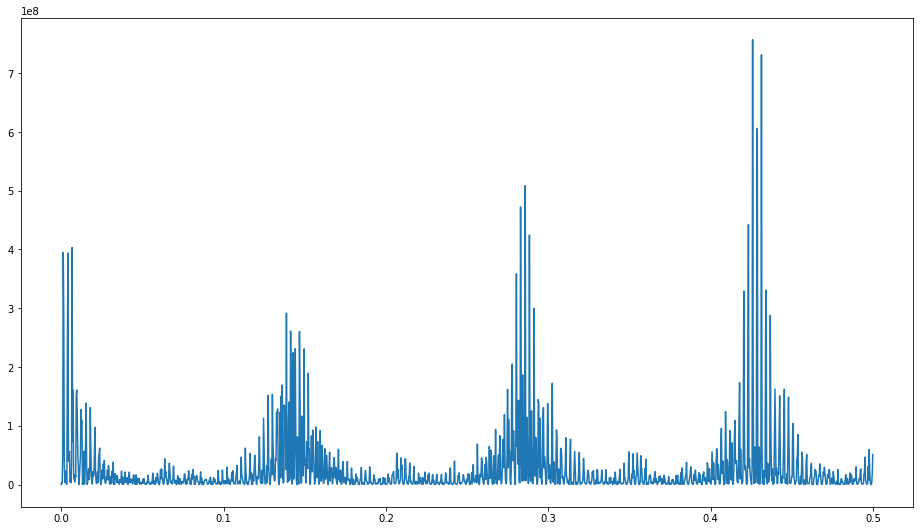

In [78]:
plt.figure(figsize=(16,9))
plt.plot(signal.periodogram(df.IAS_brut_ws.dropna())[0], signal.periodogram(df.IAS_brut_ws.dropna())[1])
plt.show()

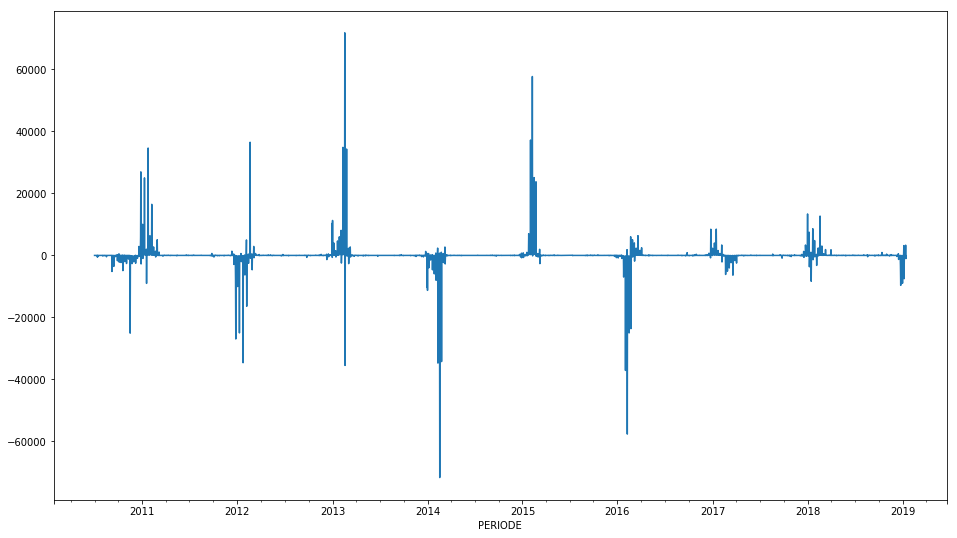

In [80]:
plt.figure(figsize=(16,9))
df.IAS_brut_ws.plot(logy=False)
plt.show()